In [1]:
%reload_ext autoreload
%autoreload 2
import cudf_tools as ct
import cudf_tools.cudf_flavor as cf
import cudf_tools.unit_methods
from kdephys.xr import xr_flavor_da, xr_flavor_ds
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from cudf_tools.unit_analysis import *
from kdephys.plot.main import *
from kdephys.plot.units import *
from acr.stim import get_pulse_train_times, get_total_spike_rate
from acr.units import get_cluster_notes, get_fr_by_cluster, get_fr_suppression_by_cluster
plt.style.use('fast')
plt.style.use('/home/kdriessen/github_t2/kdephys/kdephys/plot/acr_plots.mplstyle')

In [2]:
subject = 'ACR_18'
exp = 'swi'
stores = ['NNXr', 'NNXo']
sort_ids = [f'{exp}-{store}' for store in stores]
recordings = acr.info_pipeline.get_exp_recs(subject, exp)

In [5]:
emg = acr.io.load_concat_raw_data(subject, recordings, ['EMGr'])

In [3]:
df = load_spike_cudf(subject, sort_ids, refresh_state=False) # load spike dataframes as cudf dataframes

In [6]:
h = acr.io.load_hypno_full_exp(subject, exp)

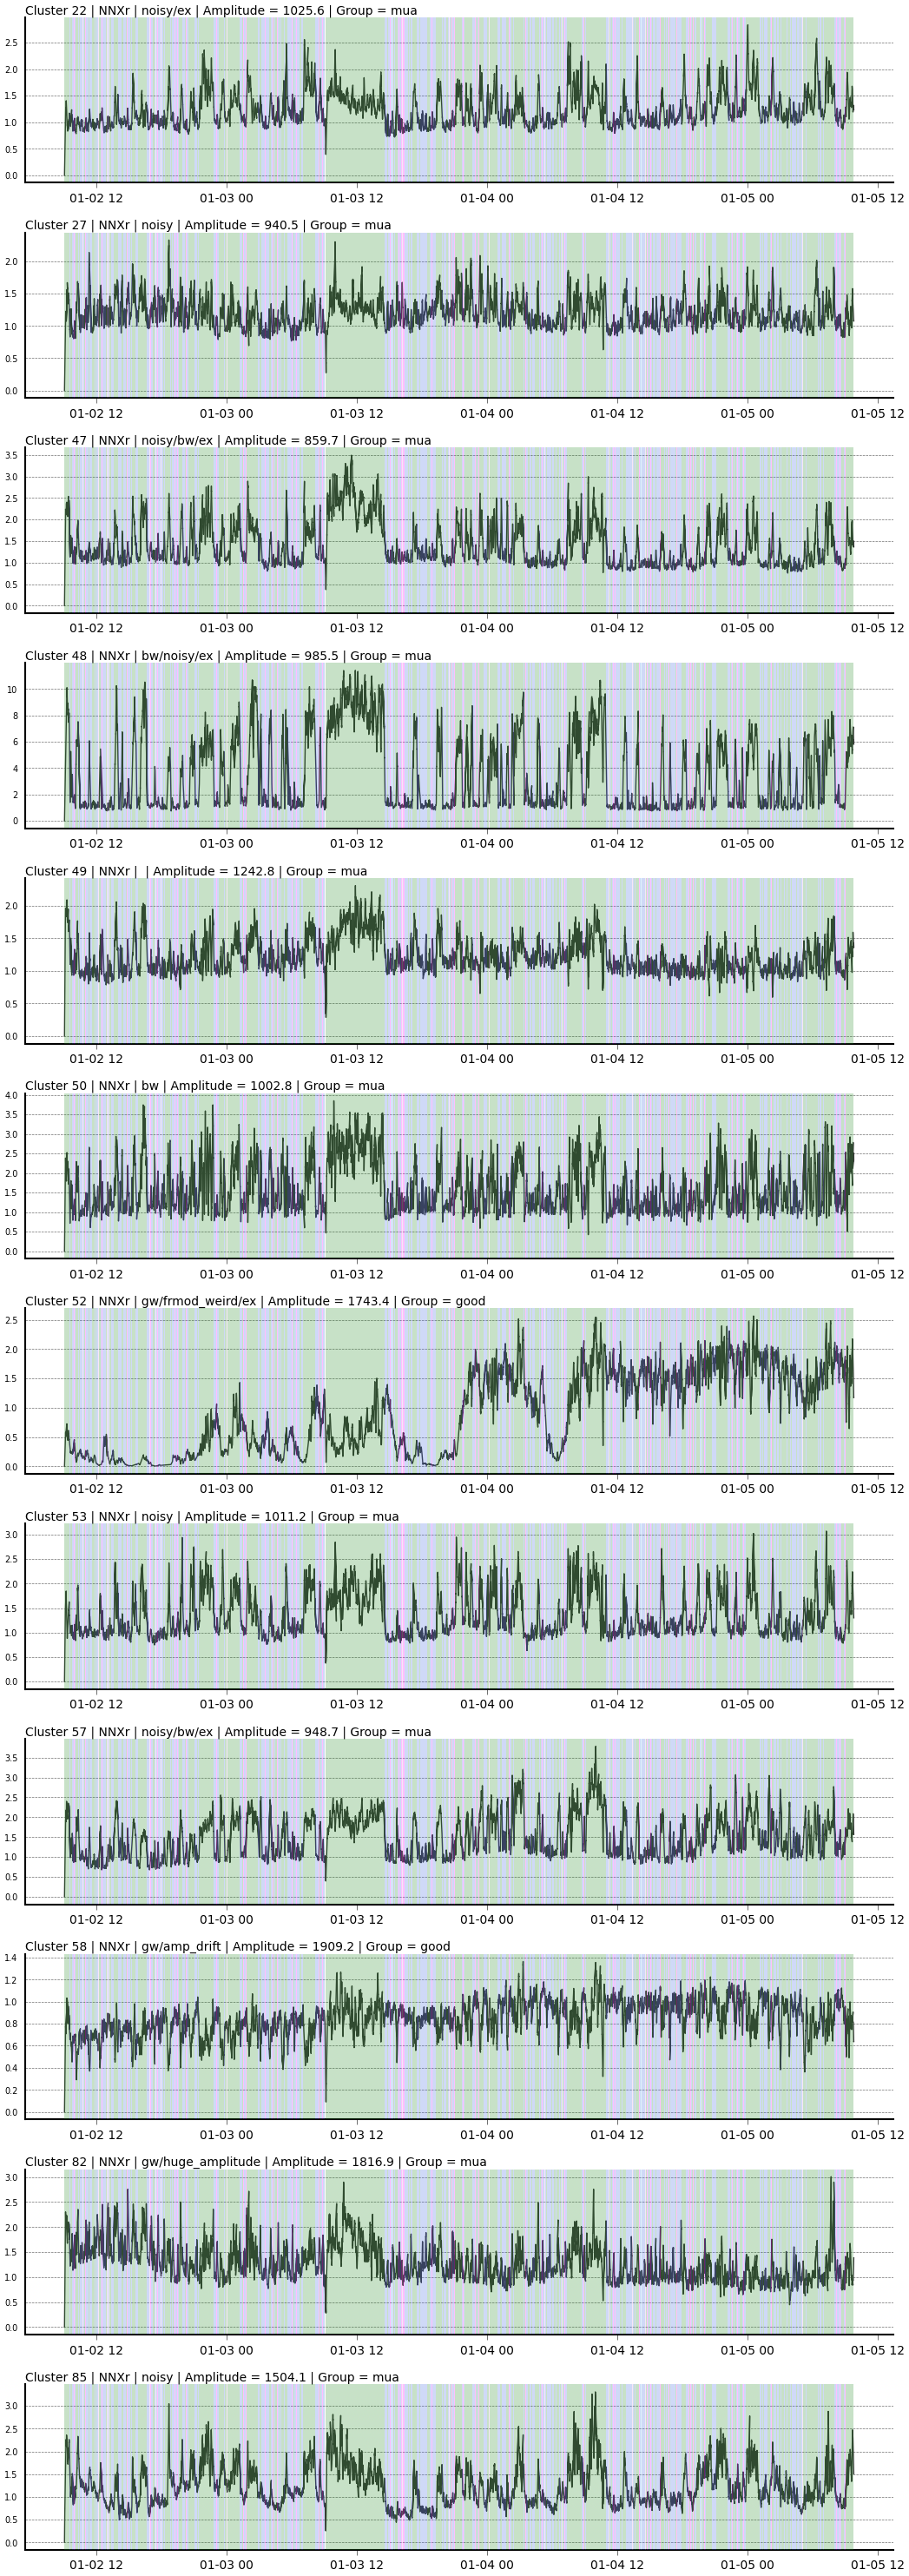

In [7]:
probe = 'NNXr'
t1 = pd.Timestamp(df.prb(probe).datetime.min())
t2 = pd.Timestamp(df.prb(probe).datetime.max())
f = plot_all_clusters(df, probe, t1, t2, window='300s', hypno=h)

MemoryError: std::bad_alloc: out_of_memory: CUDA error at: /home/kdriessen/miniconda3/envs/acrdev_cuda/include/rmm/mr/device/cuda_memory_resource.hpp

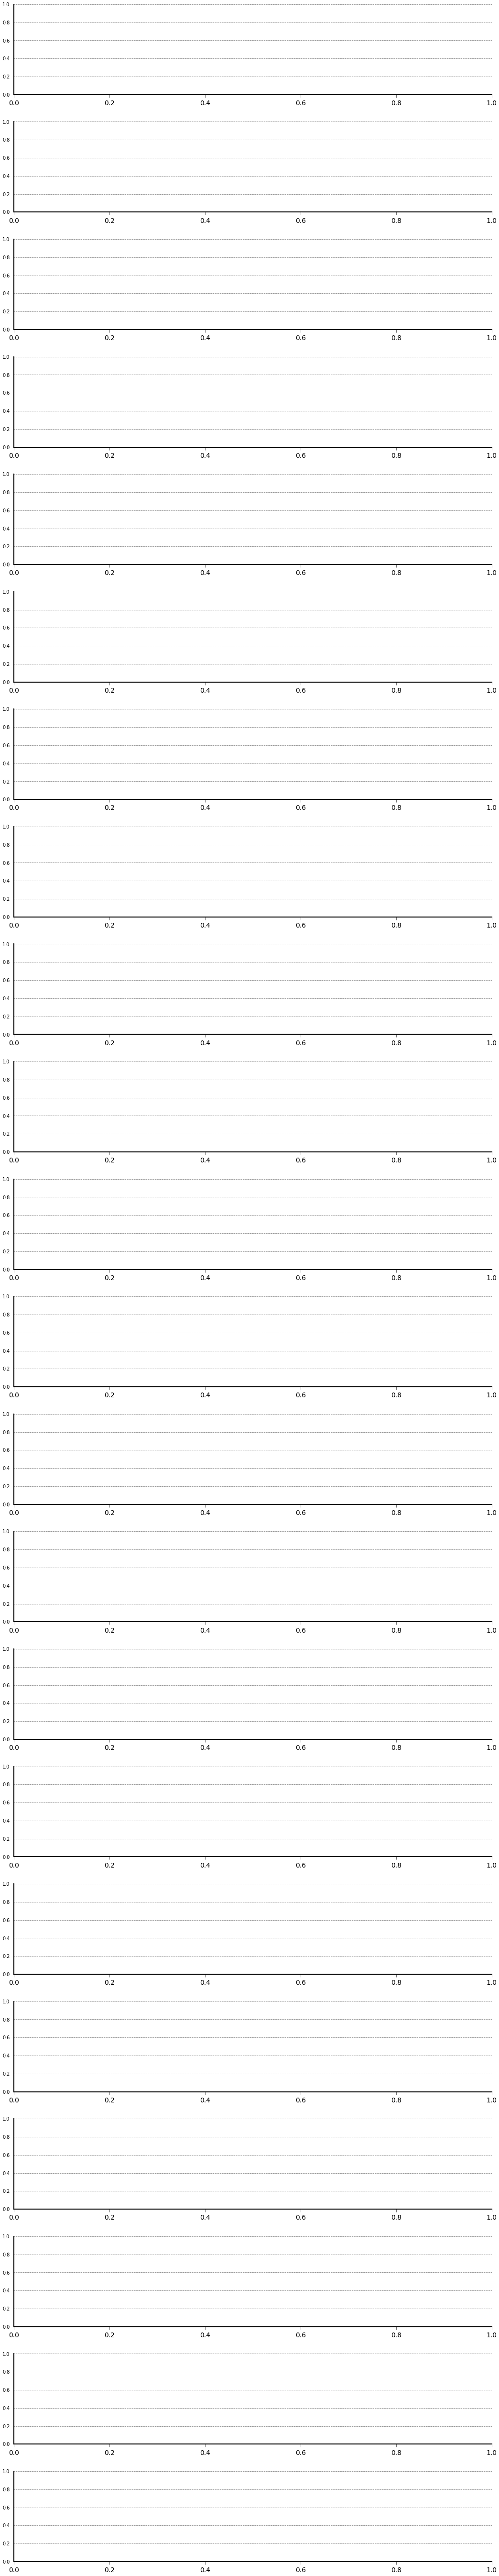

In [8]:
probe = 'NNXo'
t1 = pd.Timestamp(df.prb(probe).datetime.min())
t2 = pd.Timestamp(df.prb(probe).datetime.max())
f = plot_all_clusters(df, probe, t1, t2, window='300s', hypno=h)